# **IRWA PROJECT**

Alba González - 242783, Mario Muñoz - 229829, María Tormo - 240210

## PART 1. TEXT PROCESSING & EXPLORATORY DATA ANALYSIS





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load Python packages

In [ ]:
# if you do not have 'nltk', the following command should work "python -m pip install nltk"
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from collections import defaultdict
from array import array
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import math
import numpy as np
import collections
from numpy import linalg as la
import json
import re
import time
import requests
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import spacy
import pandas as pd
from textblob import TextBlob

Load data into memory

In [ ]:
docs_path = '/content/Rus_Ukr_war_data.json'

with open(docs_path) as fp:
    lines = fp.readlines()
lines = [l.strip().replace(' +', ' ') for l in lines]


Step 1. Pre-process documents:

● Remove stop words

● Tokenization

● Remove punctuation marks

● Stemming

● and... anything else you think it's needed (bonus point):
  - remove emojis
  - extract URLs from text

In [ ]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words("english"))

def build_terms(text):
    """
    Preprocess the article text (title + body) removing stop words, stemming,
    transforming in lowercase and return the tokens of the text.

    Argument:
    line -- string (text) to be preprocessed

    Returns:
    line - a list of tokens corresponding to the input text after the preprocessing
    """

    url_pattern = r'https?://\S+|www\.\S+'

    urls = re.findall(url_pattern, text)
    line = re.sub(url_pattern, '', text)

    line = line.lower()  ## Transform in lowercase
    clean_text = re.sub(r'[!\"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', '', text) #Remove punctuation marks
    line = re.sub(r'\W', ' ', line) #Remove emojis
    line = line.split() ## Tokenize the text to get a list of terms
    line = [word for word in line if word not in stop_words]  ##eliminate the stopwords (HINT: use List Comprehension)
    line = [stemmer.stem(word) for word in line] ## perform stemming (HINT: use List Comprehension)

    return line, urls

tweets = {}
for line in lines:
  data = json.loads(line)
  text = data["full_text"]
  processed_line, url_line = build_terms(text)

  tweets[data["id"]] = { "Tweet" : processed_line,
                        "Date": data["created_at"],
                         "Hashtags": [entity['text'] for entity in data["entities"]['hashtags']],
                         "Likes": data["favorite_count"],
                         "Retweets": data["retweet_count"],
                         "Urls": url_line }
print(tweets)

{1575918221013979136: {'Tweet': ['melsimmonsfcdo', 'wrong', 'dictat', 'putin', 'fascist', 'russia', 'intend', 'conquer', 'much', 'ukrainian', 'land', 'possibl', 'russiainvadesukrain', 'ukrainerussiawar'], 'Date': 'Fri Sep 30 18:39:17 0000 2022', 'Hashtags': ['RussiainvadesUkraine', 'UkraineRussiaWar'], 'Likes': 0, 'Retweets': 0, 'Urls': []}, 1575918081461080065: {'Tweet': ['arm', 'forc', 'liber', 'villag', 'drobyshev', 'lymansk', 'urban', 'territori', 'commun', 'donetsk', 'region', 'ukrainerussiawar', 'ukrainewar', 'ukrain', 'ukrainewillwin', 'ukrainianarmi', 'ukrainecounteroffens', 'ukrainewarnew', 'slavaukraïni', 'standwithukrain'], 'Date': 'Fri Sep 30 18:38:44 0000 2022', 'Hashtags': ['Drobysheve', 'Lymansk', 'Donetsk', 'UkraineRussiaWar', 'UkraineWar', 'Ukraine️', 'UkraineWillWin', 'UkrainianArmy', 'ukrainecounteroffensive', 'UkraineWarNews', 'SlavaUkraïni', 'StandWithUkraine'], 'Likes': 0, 'Retweets': 0, 'Urls': ['https://t.co/ifg0RXDMBQ']}, 1575917992390823936: {'Tweet': ['alert'

Convert Tweets dictionary into DataFrame

In [ ]:
#Create dataframe from tweets dictionary and traverse it (we prefer that format)
tweets_df = pd.DataFrame.from_dict(tweets).T
tweets_df.index.name = 'Tweet IDs'
display(tweets_df)

,Tweet,Date,Hashtags,Likes,Retweets,Urls
Tweet IDs,,,,,,
1575918221013979136,"[melsimmonsfcdo, wrong, dictat, putin, fascist...",Fri Sep 30 18:39:17 0000 2022,"[RussiainvadesUkraine, UkraineRussiaWar]",0,0,[]
1575918081461080065,"[arm, forc, liber, villag, drobyshev, lymansk,...",Fri Sep 30 18:38:44 0000 2022,"[Drobysheve, Lymansk, Donetsk, UkraineRussiaWa...",0,0,[https://t.co/ifg0RXDMBQ]
1575917992390823936,"[alert, poland, prep, anti, radiat, tablet, nu...",Fri Sep 30 18:38:23 0000 2022,"[NATO, Putin, Russia, RussiaInvadedUkraine, Uk...",0,0,[]
1575917907774967809,"[still, wait, googl, map, updat, russia, new, ...",Fri Sep 30 18:38:03 0000 2022,"[Putin, UkraineRussiaWar]",0,0,[]
1575917878410301441,"[emmanuelmacron, probabl, right, say, anyway, ...",Fri Sep 30 18:37:56 0000 2022,"[European, UkraineRussiaWar]",0,0,[]
...,...,...,...,...,...,...
1575154617620504576,"[ukrain, presid, warn, russia, sham, referendu...",Wed Sep 28 16:05:00 0000 2022,[UkraineRussiaWar],4,1,[https://t.co/Ld9SN2pz25]
1575154444165156864,"[germani, amusingli, share, day, old, intellig...",Wed Sep 28 16:04:19 0000 2022,"[germany, UkraineRussiaWar]",0,0,[https://t.co/IhyKe3cYGG]
1575154440012812288,"[us, embassi, moscow, urg, american, leav, rus...",Wed Sep 28 16:04:18 0000 2022,"[fakenewsfilter, RealNews, news, RussianMobili...",0,0,"[https://t.co/gQ8lbf1F7Q, https://t.co/rT1q343..."


Merge Document IDs and Tweet IDs

In [ ]:
#Read file with Document IDs and Tweet IDs
ids_data = pd.read_csv("/content/Rus_Ukr_war_data_ids.csv", sep='\t', header=None, names=["Doc IDs", "Tweet IDs"])
ids_data.head()

,Doc IDs,Tweet IDs
0,doc_1,1575918221013979136
1,doc_2,1575918081461080065
2,doc_3,1575917992390823936
3,doc_4,1575917907774967809
4,doc_5,1575917878410301441


In [ ]:
#Merge ids_data with tweets df (with tweets info)
merged_df = pd.merge(ids_data, tweets_df, on='Tweet IDs', how='inner')
display(merged_df)

,Doc IDs,Tweet IDs,Tweet,Date,Hashtags,Likes,Retweets,Urls
0,doc_1,1575918221013979136,"[melsimmonsfcdo, wrong, dictat, putin, fascist...",Fri Sep 30 18:39:17 0000 2022,"[RussiainvadesUkraine, UkraineRussiaWar]",0,0,[]
1,doc_2,1575918081461080065,"[arm, forc, liber, villag, drobyshev, lymansk,...",Fri Sep 30 18:38:44 0000 2022,"[Drobysheve, Lymansk, Donetsk, UkraineRussiaWa...",0,0,[https://t.co/ifg0RXDMBQ]
2,doc_3,1575917992390823936,"[alert, poland, prep, anti, radiat, tablet, nu...",Fri Sep 30 18:38:23 0000 2022,"[NATO, Putin, Russia, RussiaInvadedUkraine, Uk...",0,0,[]
3,doc_4,1575917907774967809,"[still, wait, googl, map, updat, russia, new, ...",Fri Sep 30 18:38:03 0000 2022,"[Putin, UkraineRussiaWar]",0,0,[]
4,doc_5,1575917878410301441,"[emmanuelmacron, probabl, right, say, anyway, ...",Fri Sep 30 18:37:56 0000 2022,"[European, UkraineRussiaWar]",0,0,[]
...,...,...,...,...,...,...,...,...
3995,doc_3996,1575154617620504576,"[ukrain, presid, warn, russia, sham, referendu...",Wed Sep 28 16:05:00 0000 2022,[UkraineRussiaWar],4,1,[https://t.co/Ld9SN2pz25]
3996,doc_3997,1575154444165156864,"[germani, amusingli, share, day, old, intellig...",Wed Sep 28 16:04:19 0000 2022,"[germany, UkraineRussiaWar]",0,0,[https://t.co/IhyKe3cYGG]
3997,doc_3998,1575154440012812288,"[us, embassi, moscow, urg, american, leav, rus...",Wed Sep 28 16:04:18 0000 2022,"[fakenewsfilter, RealNews, news, RussianMobili...",0,0,"[https://t.co/gQ8lbf1F7Q, https://t.co/rT1q343..."
3998,doc_3999,1575154351273873410,"[stage, fake, referendum, septemb, 2022, russi...",Wed Sep 28 16:03:56 0000 2022,[UkraineRussiaWar],13,2,[https://t.co/XQOJq8b3M1]


##Step 2. Exploratory Data Analysis:


##Word counting distribution



Average =  17.459


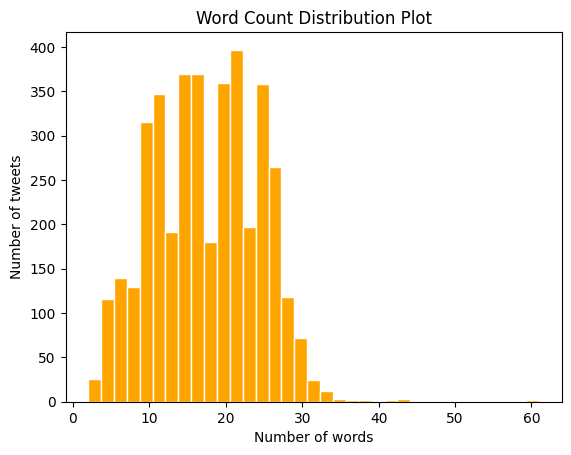

In [ ]:
#count the number of words on each tweet
word_count = []
for tweet in merged_df["Tweet"]:
  count = len(tweet)
  word_count.append(count)

print("Average = ", sum(word_count)/len(word_count))

#display word counting distribution
plt.hist(word_count , bins=35, edgecolor='white', color='orange')
plt.title("Word Count Distribution Plot")
plt.xlabel("Number of words")
plt.ylabel("Number of tweets")
plt.show()

Word Cloud for most frequent words

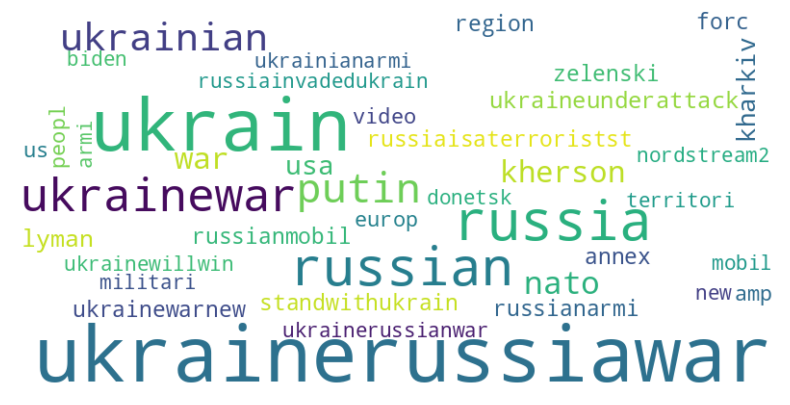

In [ ]:
#search for the n most common words
n = 40
all_words = merged_df["Tweet"].explode().tolist()
word_frequencies = Counter(all_words)
most_common_words = word_frequencies.most_common(n)

#create a dictionary with n most common words and his frequency
words_count = dict(most_common_words)

#display wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words_count)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

###Ranking of Top 10 Tweets with most Retweets

In [ ]:
# Sort the DataFrame by the "Retweets" column in descending order to create a ranking
ranked_retweets = merged_df.sort_values(by='Retweets', ascending=False)

# Reset the index of the DataFrame
ranked_retweets.reset_index(drop=True, inplace=True)

# Display the top-10 ranking of tweets
display(ranked_retweets.head(10))

,Doc IDs,Tweet IDs,Tweet,Date,Hashtags,Likes,Retweets,Urls
0,doc_1220,1575775162674212865,"[situat, around, lyman, sep, 30, 11, 00, ua, f...",Fri Sep 30 09:10:49 0000 2022,[UkraineRussiaWar],3701,646,[https://t.co/jGJUhXcr1y]
1,doc_2814,1575396903252025351,"[uniqu, rare, photo, ukrainian, forward, comma...",Thu Sep 29 08:07:45 0000 2022,"[Kharkiv, UkraineRussiaWar]",2685,338,[https://t.co/AmSijyM59c]
2,doc_3766,1575181552170201088,"[oper, interflex, ukrainian, recruit, continu,...",Wed Sep 28 17:52:02 0000 2022,[UkraineRussiaWar],2155,283,[https://t.co/oYWThs8qNe]
3,doc_1847,1575625313446289409,"[follow, countri, urg, citizen, leav, updat, g...",Thu Sep 29 23:15:23 0000 2022,"[UkraineRussiaWar, AnnexationofUkraine, NAFO]",923,251,[]
4,doc_1388,1575742923068813314,"[russian, shell, outskirt, zaporizhzhia, hit, ...",Fri Sep 30 07:02:43 0000 2022,"[Zaporizhzhia, UkraineRussiaWar]",694,247,[https://t.co/365j43jy51]
5,doc_1210,1575778551248605184,"[war, end, call, annex, referendum, genuin, ex...",Fri Sep 30 09:24:17 0000 2022,"[Ukraine, UkraineRussiaWar, NFTs]",270,236,[https://t.co/yfZAeV7K8d]
6,doc_1533,1575686562616004609,"[russia, may, drop, 11, meter, long, x, 22, mi...",Fri Sep 30 03:18:46 0000 2022,"[Dnipro, NATORussiaWar, UkraineRussiaWar, Kher...",713,184,[https://t.co/NuRQPVMzkJ]
7,doc_206,1575896773511434240,"[ukrainian, forc, liber, drobyshev, donetsk, o...",Fri Sep 30 17:14:04 0000 2022,"[Donetsk, UkraineRussiaWar]",1407,171,[https://t.co/7wUCdcA7NZ]
8,doc_2119,1575559188079845376,"[kostyantyn, nemichev, command, kraken, specia...",Thu Sep 29 18:52:37 0000 2022,[UkraineRussiaWar],1407,136,[https://t.co/vpQcmL92q7]
9,doc_3802,1575178643772297216,"[ukrainian, paratroop, btr, 3, offens, kharkiv...",Wed Sep 28 17:40:28 0000 2022,"[Kharkiv, Donetsk, UkraineRussiaWar]",1348,133,[https://t.co/00LrzsG7QO]


###Plot with most Retweeted Tweets with Tweet IDs versus Retweeted counter

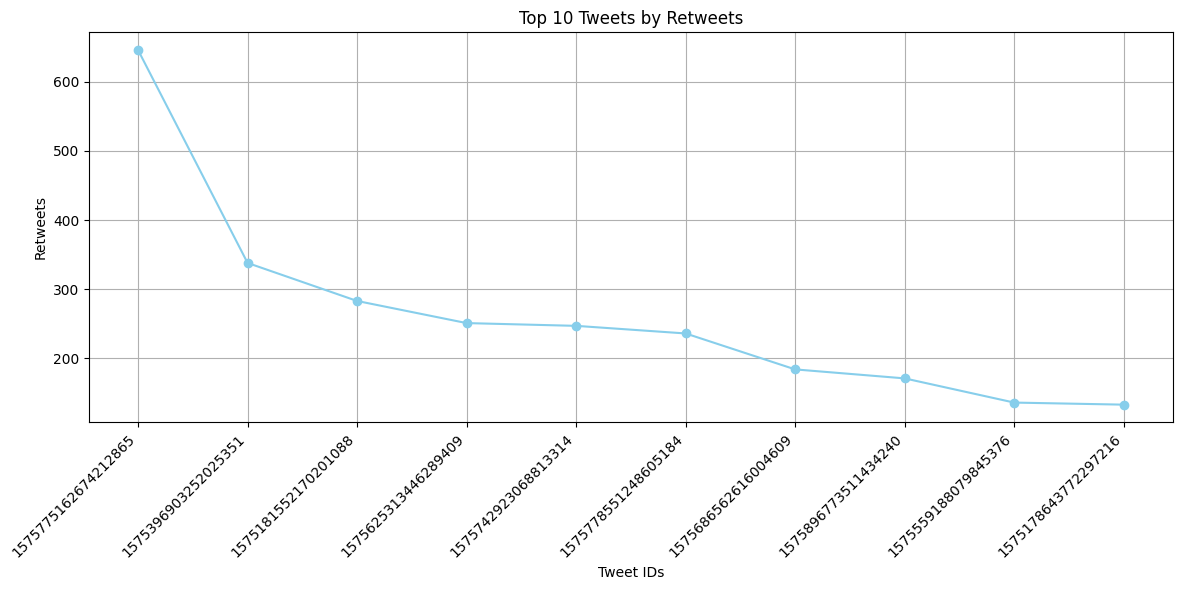

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already sorted and reset the index of 'merged_df'
# You can use 'ranked_tweets' to create the line plot

# Get the top 10 tweets
top_10_retweets = ranked_retweets.head(10)

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), top_10_retweets['Retweets'], marker='o', linestyle='-', color='skyblue')
plt.xlabel('Tweet IDs')
plt.ylabel('Retweets')
plt.title('Top 10 Tweets by Retweets')
plt.grid(True)

# Set custom x-axis labels
plt.xticks(range(1, 11), top_10_retweets['Tweet IDs'], rotation=45, ha='right')
plt.tight_layout()

# Display the line plot
plt.show()

###Ranking of Top 10 Tweets with most Likes (highest like counter)

In [ ]:
# Sort the DataFrame by the "Retweets" column in descending order to create a ranking
ranked_likes = merged_df.sort_values(by='Likes', ascending=False)

# Reset the index of the DataFrame
ranked_likes.reset_index(drop=True, inplace=True)

# Display the top-10 ranking of tweets
display(ranked_likes.head(10))

,Doc IDs,Tweet IDs,Tweet,Date,Hashtags,Likes,Retweets,Urls
0,doc_1220,1575775162674212865,"[situat, around, lyman, sep, 30, 11, 00, ua, f...",Fri Sep 30 09:10:49 0000 2022,[UkraineRussiaWar],3701,646,[https://t.co/jGJUhXcr1y]
1,doc_2814,1575396903252025351,"[uniqu, rare, photo, ukrainian, forward, comma...",Thu Sep 29 08:07:45 0000 2022,"[Kharkiv, UkraineRussiaWar]",2685,338,[https://t.co/AmSijyM59c]
2,doc_3766,1575181552170201088,"[oper, interflex, ukrainian, recruit, continu,...",Wed Sep 28 17:52:02 0000 2022,[UkraineRussiaWar],2155,283,[https://t.co/oYWThs8qNe]
3,doc_2824,1575391586422243333,"[czech, volunt, ongo, offens, ukrainian, forc,...",Thu Sep 29 07:46:38 0000 2022,"[Kharkiv, UkraineRussiaWar]",1631,114,[https://t.co/u9tnLGvXlw]
4,doc_206,1575896773511434240,"[ukrainian, forc, liber, drobyshev, donetsk, o...",Fri Sep 30 17:14:04 0000 2022,"[Donetsk, UkraineRussiaWar]",1407,171,[https://t.co/7wUCdcA7NZ]
5,doc_2119,1575559188079845376,"[kostyantyn, nemichev, command, kraken, specia...",Thu Sep 29 18:52:37 0000 2022,[UkraineRussiaWar],1407,136,[https://t.co/vpQcmL92q7]
6,doc_3802,1575178643772297216,"[ukrainian, paratroop, btr, 3, offens, kharkiv...",Wed Sep 28 17:40:28 0000 2022,"[Kharkiv, Donetsk, UkraineRussiaWar]",1348,133,[https://t.co/00LrzsG7QO]
7,doc_451,1575855193547165696,"[zelenski, announc, ukrain, submit, acceler, a...",Fri Sep 30 14:28:50 0000 2022,[UkraineRussiaWar],1083,96,[https://t.co/3uIQx0I9HI]
8,doc_1847,1575625313446289409,"[follow, countri, urg, citizen, leav, updat, g...",Thu Sep 29 23:15:23 0000 2022,"[UkraineRussiaWar, AnnexationofUkraine, NAFO]",923,251,[]
9,doc_1245,1575768715668656128,"[ukrainian, forc, liber, yampil, donetsk, obla...",Fri Sep 30 08:45:12 0000 2022,"[Donetsk, UkraineRussiaWar]",868,69,[https://t.co/592W2houOq]


###Plot with most Retweeted Tweets with Tweet IDs versus Retweeted counter

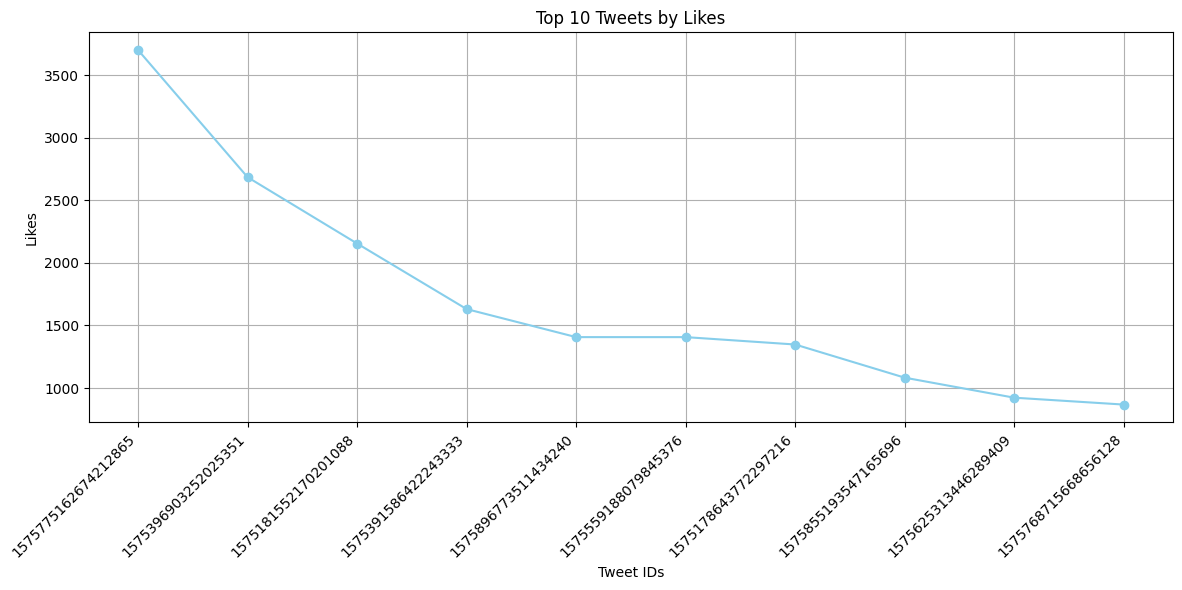

In [ ]:
import matplotlib.pyplot as plt

# Sort the DataFrame by the "Likes" column in descending order to create a ranking
ranked_likes = merged_df.sort_values(by='Likes', ascending=False)

# Reset the index of the DataFrame
ranked_likes.reset_index(drop=True, inplace=True)

# Get the top 10 tweets
top_10_likes = ranked_likes.head(10)

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), top_10_likes['Likes'], marker='o', linestyle='-', color='skyblue')
plt.xlabel('Tweet IDs')
plt.ylabel('Likes')
plt.title('Top 10 Tweets by Likes')
plt.grid(True)

# Set custom x-axis labels
plt.xticks(range(1, 11), top_10_likes['Tweet IDs'], rotation=45, ha='right')
plt.tight_layout()

# Display the line plot
plt.show()

###Entity Recognition

In [ ]:
# Load the language model
nlp = spacy.load("en_core_web_sm")

# Process the text and count entities
entity_counter = Counter()

for tweet in merged_df["Tweet"].to_list():
    tweet2string = " ".join(tweet)
    doc = nlp(tweet2string)

    # Count entities
    for ent in doc.ents:
        entity_counter[ent.text] += 1

# Sort entities by count in descending order
sorted_entities = sorted(entity_counter.items(), key=lambda x: x[1], reverse=True)

# Display the top 5 entities
for ent, count in sorted_entities[:5]:
    print(f"Entity: {ent}, Count: {count}")

Entity: russia, Count: 1802
Entity: russian, Count: 1526
Entity: nato, Count: 364
Entity: putin, Count: 235
Entity: zelenski, Count: 194


## Sentimental Analysis

In [ ]:
def analyze_sentiment(tweet):
    tweet = ' '.join(tweet)
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity == 0:
        return "Neutral"
    else:
        return "Negative"

In [ ]:
def get_entities(tweet_words):
    tweet_words = tweet_words
    tweet2string = " ".join(tweet_words)
    doc = nlp(tweet2string)
    entities = [{'Entity': entity.text, 'Label': entity.label_}for entity in doc.ents]
    return entities

In [ ]:
merged_df2 = merged_df.copy()
merged_df2['Sentiment'] = merged_df2['Tweet'].apply(analyze_sentiment)

merged_df2['Entites'] = merged_df2['Tweet'].apply(get_entities)
merged_df2.head(2)

,Doc IDs,Tweet IDs,Tweet,Date,Hashtags,Likes,Retweets,Urls,Sentiment,Entites
0,doc_1,1575918221013979136,"[melsimmonsfcdo, wrong, dictat, putin, fascist...",Fri Sep 30 18:39:17 0000 2022,"[RussiainvadesUkraine, UkraineRussiaWar]",0,0,[],Negative,"[{'Entity': 'putin', 'Label': 'PERSON'}, {'Ent..."
1,doc_2,1575918081461080065,"[arm, forc, liber, villag, drobyshev, lymansk,...",Fri Sep 30 18:38:44 0000 2022,"[Drobysheve, Lymansk, Donetsk, UkraineRussiaWa...",0,0,[https://t.co/ifg0RXDMBQ],Neutral,[]


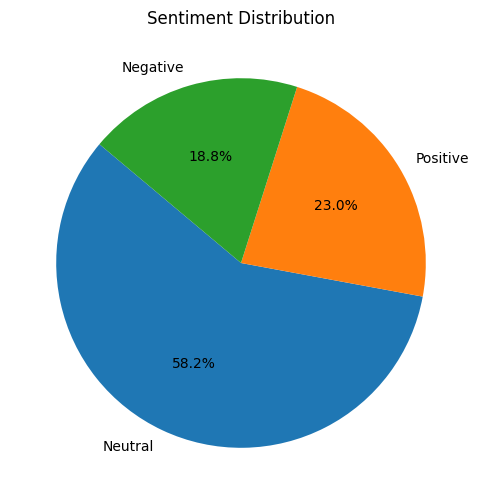

In [ ]:
# Count the number of tweets in each sentiment category
sentiment_counts = merged_df2['Sentiment'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')

# Show the pie chart
plt.show()

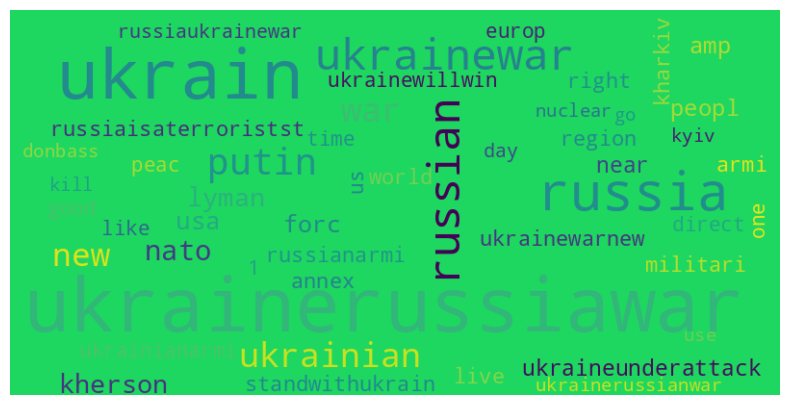

In [ ]:
#Word Cloud of positive tweets
n = 50
print
all_words = merged_df2[merged_df2['Sentiment']== "Positive"]["Tweet"].explode().tolist()
word_frequencies = Counter(all_words)
most_common_words = word_frequencies.most_common(n)

#create a dictionary with n most common words and his frequency
words_count = dict(most_common_words)

#display wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='#1ed760').generate_from_frequencies(words_count)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

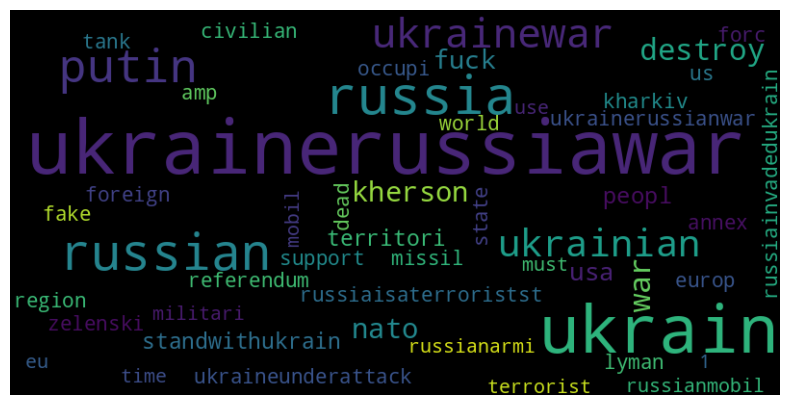

In [ ]:
#Word Cloud of negative tweets
n = 50
print
all_words = merged_df2[merged_df2['Sentiment']== "Negative"]["Tweet"].explode().tolist()
word_frequencies = Counter(all_words)
most_common_words = word_frequencies.most_common(n)

#create a dictionary with n most common words and his frequency
words_count = dict(most_common_words)

#display wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(words_count)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# PART 2. INDEXING & EVALUATION

###Indexing

**1. Build inverted index**: After having pre-processed the data, you can then create the
inverted index.

HINT - you may use the vocabulary data structure, like the one seen during the
Practical Labs:

{

Term_id_1: [document_1, document_2, document_4],

Term_id_2: [document_1, document_3, document_5, document_6],

etc...

}

Documents information: Since we are dealing with conjunctive queries (AND), each
of the returned documents should contain all the words in the query.

In [ ]:
def create_index(lines):
    """
    Implement the inverted index

    Argument:
    lines -- collection of tweets

    Returns:
    index - the inverted index (implemented through a Python dictionary) containing terms as keys and the corresponding
    list of documents where these keys appears in (and the positions) as values.
    """
    index = defaultdict(list)
    tweet_index = {}  # dictionary to map page titles to page ids

    for line in lines:  # lines contain all tweets
        tweet_id = line[0]
        terms = line[1]
        tweet_index[tweet_id] = line[1]


        current_page_index = {}

        for position, term in enumerate(terms): #Loop over all terms
            try:
                current_page_index[term][1].append(position)
            except:
                current_page_index[term]=[tweet_id, array('I',[position])] #'I' indicates unsigned int (int in Python)

        #merge the current page index with the main index
        for term_page, posting_page in current_page_index.items():
            index[term_page].append(posting_page)

    return index, tweet_index

In [ ]:
lines = []
for index, row in merged_df.iterrows():
    doc_id = row['Doc IDs']
    tweet = row['Tweet']
    line = [doc_id, tweet]
    lines.append(line)

# Apply index function for all the tweets
index, tweet_index = create_index(lines)


print("The",len(index['pray']),"results for the term 'pray' are: {}\n".format(index['pray']))


The 11 results for the term 'pray' are: [['doc_958', array('I', [8])], ['doc_983', array('I', [0])], ['doc_987', array('I', [3])], ['doc_1186', array('I', [16])], ['doc_1644', array('I', [3])], ['doc_1645', array('I', [0])], ['doc_1791', array('I', [17])], ['doc_2648', array('I', [0])], ['doc_2654', array('I', [3])], ['doc_3190', array('I', [3])], ['doc_3192', array('I', [0])]]



In [ ]:
for term, doc_positions in index.items():
  doc_ids = list(set(doc_position[0] for doc_position in doc_positions))
  print(f"{term}: {doc_ids}")
  break

print("Results for {}: {}".format('disinform', index['disinform']))

melsimmonsfcdo: ['doc_1']
Results for disinform: [['doc_1187', array('I', [11])], ['doc_2762', array('I', [5, 11])], ['doc_3324', array('I', [3])], ['doc_3439', array('I', [12])]]


**2. Propose test queries**: Define five queries that will be used to evaluate your search
engine (e.g., “presidents visiting Kyiv”, “countries supporting Ukraine”)

HINT: How to choose the queries? The selection of the queries is up to you but it’s
suggested to select terms based on the popularity (keywords ranked by term
frequencies or by TF-IDF, etc...).

In [ ]:
def search(query, index):
    """
    The output is the list of documents that contain any of the query terms.
    So, we will get the list of documents for each query term, and take the union of them.
    """
    query = build_terms(query)
    docs = set()
    for term in query:
        for i in range(len(term)):
            try:
                # store in term_docs the ids of the docs that contain "term"
                term_docs = [posting[0] for posting in index[term[i]]]
                print(f"Query Term: {term[i]}, Matching Docs: {term_docs}")
                # docs = docs Union term_docs
                docs = docs.union(term_docs)

            except:
                #term is not in index
                pass
    docs = list(docs)
    return docs

In [ ]:
print("Insert the 1st query:\n")
query = input()
docs = search(query, index)
top = 10

print("\n======================\nSample of {} results out of {} for the searched query:\n".format(top, len(docs)))
for d_id in docs[:top]:
    print("page_id= {} | processed_tweet: {}".format(d_id, tweet_index[d_id]))

Insert the 1st query:

President of Ukraine
Query Term: presid, Matching Docs: ['doc_16', 'doc_30', 'doc_87', 'doc_131', 'doc_143', 'doc_156', 'doc_177', 'doc_179', 'doc_228', 'doc_233', 'doc_247', 'doc_281', 'doc_328', 'doc_365', 'doc_403', 'doc_408', 'doc_417', 'doc_418', 'doc_448', 'doc_453', 'doc_459', 'doc_460', 'doc_470', 'doc_507', 'doc_581', 'doc_585', 'doc_632', 'doc_654', 'doc_656', 'doc_704', 'doc_766', 'doc_928', 'doc_962', 'doc_1193', 'doc_1196', 'doc_1197', 'doc_1199', 'doc_1241', 'doc_1389', 'doc_1464', 'doc_1474', 'doc_1483', 'doc_1491', 'doc_1588', 'doc_1620', 'doc_1665', 'doc_1736', 'doc_1771', 'doc_1793', 'doc_1868', 'doc_1886', 'doc_1887', 'doc_1893', 'doc_1961', 'doc_1967', 'doc_2009', 'doc_2060', 'doc_2099', 'doc_2145', 'doc_2328', 'doc_2393', 'doc_2394', 'doc_2446', 'doc_2494', 'doc_2594', 'doc_2637', 'doc_2813', 'doc_2852', 'doc_2908', 'doc_2938', 'doc_3078', 'doc_3087', 'doc_3092', 'doc_3129', 'doc_3187', 'doc_3383', 'doc_3434', 'doc_3473', 'doc_3564', 'doc_369


**3. Rank your results**: Implement the TF-IDF algorithm and provide ranking based
results.

In [ ]:
def create_index_tfidf(lines, num_tweets):
    """
    Implement the inverted index and compute tf, df and idf

    Argument:
    lines -- collection of Wikipedia articles
    num_documents -- total number of documents

    Returns:
    index - the inverted index (implemented through a Python dictionary) containing terms as keys and the corresponding
    list of document these keys appears in (and the positions) as values.
    tf - normalized term frequency for each term in each document
    df - number of documents each term appear in
    idf - inverse document frequency of each term
    """

    index = defaultdict(list)
    tweet_index = {}
    tf = defaultdict(list)  # term frequencies of terms in documents (documents in the same order as in the main index)
    df = defaultdict(int)  # document frequencies of terms in the corpus
    idf = defaultdict(float) #inverse document frequency for each term

    for line in lines:
        tweet_id = line[0]
        terms = line[1]
        tweet_index[tweet_id] = line[1]

        current_page_index = {}

        for position, term in enumerate(terms):  ## terms contains page_title + page_text
            try:
                # if the term is already in the dict append the position to the corresponding list
                current_page_index[term][1].append(position)
            except:
                # Add the new term as dict key and initialize the array of positions and add the position
                current_page_index[term]=[tweet_id, array('I',[position])] #'I' indicates unsigned int (int in Python)

        #normalize term frequencies
        # Compute the denominator to normalize term frequencies (formula 2 above)
        # norm is the same for all terms of a document.
        norm = 0
        for term, posting in current_page_index.items():
            # posting will contain the list of positions for current term in current document.
            # posting ==> [current_doc, [list of positions]]
            # you can use it to infer the frequency of current term.
            norm += len(posting[1]) ** 2
        norm = math.sqrt(norm)

        # calculate the tf(dividing the term frequency by the above computed norm) and df weights
        for term, posting in current_page_index.items():
            # append the tf for current term (tf = term frequency in current doc/norm)
            tf[term].append(np.round(len(posting[1])/norm,4)) ## SEE formula (1) above
            #increment the document frequency of current term (number of documents containing the current term)
            df[term] += 1  # increment DF for current term

        #merge the current page index with the main index
        for term_page, posting_page in current_page_index.items():
            term_page = str(term_page)
            index[term_page].append(posting_page)

        # Compute IDF following the formula (3) above. HINT: use np.log
        for term in df:
            idf[term] = np.round(np.log(float(num_tweets/df[term])), 4)

    return index, tf, df, idf, tweet_index

In [ ]:
num_tweets= len(tweets)
lines = []
for index, row in merged_df.iterrows():
    doc_id = row['Doc IDs']
    tweet = row['Tweet']
    line = [doc_id, tweet]
    lines.append(line)

index2, tf, df, idf, tweet_index2 = create_index_tfidf(lines, num_tweets)

In [ ]:
def rank_documents(terms, docs, index, idf, tf, title_index):
    """
    Perform the ranking of the results of a search based on the tf-idf weights

    Argument:
    terms -- list of query terms
    docs -- list of documents, to rank, matching the query
    index -- inverted index data structure
    idf -- inverted document frequencies
    tf -- term frequencies
    title_index -- mapping between page id and page title

    Returns:
    Print the list of ranked documents
    """

    # I'm interested only on the element of the docVector corresponding to the query terms
    # The remaining elements would became 0 when multiplied to the query_vector
    doc_vectors = defaultdict(lambda: [0] * len(terms)) # I call doc_vectors[k] for a nonexistent key k, the key-value pair (k,[0]*len(terms)) will be automatically added to the dictionary
    query_vector = [0] * len(terms)

    # compute the norm for the query tf
    query_terms_count = collections.Counter(terms)  # get the frequency of each term in the query.
    # Example: collections.Counter(["hello","hello","world"]) --> Counter({'hello': 2, 'world': 1})
    # HINT: use when computing tf for query_vector

    query_norm = la.norm(list(query_terms_count.values()))

    for termIndex, term in enumerate(terms):  #termIndex is the index of the term in the query
        if term not in index:
            continue

        ## Compute tf*idf(normalize TF as done with documents)
        query_vector[termIndex]=(query_terms_count[term]/query_norm) * idf[term]

        # Generate doc_vectors for matching docs
        for doc_index, (doc, postings) in enumerate(index[term]):
            # Example of [doc_index, (doc, postings)]
            # 0 (26, array('I', [1, 4, 12, 15, 22, 28, 32, 43, 51, 68, 333, 337]))
            # 1 (33, array('I', [26, 33, 57, 71, 87, 104, 109]))
            # term is in doc 26 in positions 1,4, .....
            # term is in doc 33 in positions 26,33, .....

            #tf[term][0] will contain the tf of the term "term" in the doc 26
            if doc in docs:
                doc_vectors[doc][termIndex] = tf[term][doc_index] * idf[term]  # TODO: check if multiply for idf

    # Calculate the score of each doc
    # compute the cosine similarity between queyVector and each docVector:
    # HINT: you can use the dot product because in case of normalized vectors it corresponds to the cosine similarity
    # see np.dot

    doc_scores=[[np.dot(curDocVec, query_vector), doc] for doc, curDocVec in doc_vectors.items() ]
    doc_scores.sort(reverse=True)
    result_docs = [x[1] for x in doc_scores]
    result_scores = [x[0] for x in doc_scores]
    #print document titles instead if document id's
    #result_docs=[ title_index[x] for x in result_docs ]
    if len(result_docs) == 0:
        print("No results found, try again")
    #print ('\n'.join(result_docs), '\n')
    return result_docs, result_scores

In [ ]:
def search_tf_idf(query, index):
    """
    output is the list of documents that contain any of the query terms.
    So, we will get the list of documents for each query term, and take the union of them.
    """
    query = build_terms(query)
    #print(query)
    docs = set()
    # Remove empty lists from the list of terms
    query = [term for term in query[0] if term]
    #print(query)

    for term in query:
        #print(term, "1")
        try:
            # store in term_docs the ids of the docs that contain "term"
            term_docs=[ posting[0] for posting in index[term]]
            #print(f"Query Term: {term}, Matching Docs: {term_docs}")

            # docs = docs Union term_docs
            docs = docs.union(set(term_docs))
        except:
            #term is not in index
            pass
    docs = list(docs)
    ranked_docs, result_scores = rank_documents(query, docs, index2, idf, tf, tweet_index2)
    return ranked_docs, result_scores

In [ ]:
print("Insert your query:\n")
query = input()
ranked_docs, result_scores = search_tf_idf(query, index2)
top = 10

print(f"\n======================\nTop {top} results out of {len(ranked_docs)} for the searched query ({query}):\n")
for d_id in ranked_docs[:top]:
    print("page_id= {} - page_title: {}".format(d_id, tweet_index2[d_id]))

Insert your query:

President of Ukraine

Top 10 results out of 2691 for the searched query (President of Ukraine):

page_id= doc_2394 - page_title: ['septemb', '30', 'presid', 'zelenskyyua', 'conven', 'urgent', 'meet', 'nsdc_ua', 'said', 'nikiforov', 'presid', 'spokesman', 'ukrain', 'ukrainerussiawar']
page_id= doc_470 - page_title: ['ukrain', 'negoti', 'russia', 'long', 'presid', 'vladimir', 'putin', 'presid', 'zelenskyyua', 'announc', 'wake', 'annex', 'occupi', 'territori', 'ukrain', 'ukrainerussiawar', 'russia', 'russiainvadedukrain']
page_id= doc_3996 - page_title: ['ukrain', 'presid', 'warn', 'russia', 'sham', 'referendum', 'attempt', 'annex', 'ukrainian', 'territori', 'rule', 'talk', 'moscow', 'long', 'vladimir', 'putin', 'remain', 'presid', 'ukrainerussiawar', 'credit', 'pa', 'un']
page_id= doc_3434 - page_title: ['ukrainian', 'presid', 'volodymyr', 'zelenskyy', 'call', 'russian', 'occupi', 'troop', 'surrend', 'ukrain', 'flee', 'fight', 'dictatorship', 'countri', 'want', 'survi

## Evaluation

In [ ]:
queries = ['tank in kharkiv', 'nordstream pipeline', 'annexation of territories', 'presidents visiting kyiv', 'countries supporting Ukraine']

for query in queries:
    ranked_docs, result_scores = search_tf_idf(query, index2)
    top = 10

    print(f"\n======================\nTop {top} results out of {len(ranked_docs)} for the searched query ({query}):\n")
    for i, d_id in enumerate(ranked_docs[:top]):
        print(f"page_id= {d_id} score= {round(result_scores[i], 2)} - page_title: {tweet_index2[d_id]}")
    print(f"\n\n\n")


Top 10 results out of 404 for the searched query (tank in kharkiv):

page_id= doc_2234 score= 5.52 - page_title: ['destroy', 'ukrainian', 'tank', 'kharkiv', 'region', 'ukrain', 'ukrainewar', 'ukrainerussiawar', 'kharkiv']
page_id= doc_3336 score= 5.47 - page_title: ['first', 'tank', 'tank', 'footag', 'come', 'across', 'ukrain', 'ukrainerussiawar', 'russia', 'ukrainerussia']
page_id= doc_1399 score= 5.4 - page_title: ['ukrainian', 'tank', 'hold', 'ground', 'two', 'advanc', 'russian', 'tank', 'unfortun', 'ukrainian', 'tank', 'take', 'fatal', 'hit', 'ukrain', 'ukrainerussiacrisi', 'warcrim', 'ukrainerussiawar', 'kyiv', 'mariupol', 'chernihiv', 'lviv', 'kharkiv', 'melitopol', 'irpin', 'bucha', 'borodyanka', 'odesa', 'crimea']
page_id= doc_2835 score= 5.37 - page_title: ['tank', 'pacif', 'fleet', 'marin', 'vs', 'ukrainian', 'tank', 'ukrainian', 'tank', 'destroy', 'direct', 'hit', 'ukrainianarmi', 'ukrainerussiawar', 'ukrainewar', 'ukrain', 'russianukrainianwar', 'russianarmi', 'russia', 'r

In [ ]:
# Evaluation functions
def precision_k (y_true, y_score, k=10, val_order='up'):
    val = 1 if val_order == "up" else -1
    y_true = y_true.take(y_score.argsort()[::val])
    relevant_cases = np.sum(y_true[:k])
    return float(relevant_cases/k)

def recall_k (y_true, y_score, k=10, val_order='up'):
    val = 1 if val_order == "up" else -1
    order = y_score.argsort()[::val]
    y_true = y_true.take(order)
    relevant = np.sum(y_true[:k])
    total_relevant = np.sum(y_true[:])
    return float(relevant/total_relevant)

def f1_score(precision, recall):
    return (2*precision*recall)/(precision+recall)

def avg_precision_at_k(doc_score, y_score, k=10, val_order='up'):
    val = 1 if val_order == "up" else -1
    gtp = np.sum(doc_score == 1)
    order = np.argsort(y_score)[::val]
    doc_score = np.take(doc_score, order[:k])
    if gtp == 0:
        return 0
    n_relevant_at_i = 0
    prec_at_i = 0
    for i in range(len(doc_score)):
        if doc_score[i] == 1:
            n_relevant_at_i += 1
            prec_at_i += n_relevant_at_i / (i + 1)
    return prec_at_i / gtp

def map_at_k(search_res, k=10):
    avp = []
    for q in search_res["query_id"].unique():
        curr_data = search_res[search_res["query_id"] == q]
        avp.append(avg_precision_at_k(np.array(curr_data["label"]),
                   np.array(curr_data["doc"]), k))
    return np.sum(avp) / len(avp)

def rr_at_k(doc_score, y_score, k=10, val_order='up'):
    val = 1 if val_order == "up" else -1
    order = np.argsort(y_score)[::val]
    doc_score = np.take(doc_score, order[:k])
    if np.sum(doc_score) == 0:
        return 0
    return 1 / (np.argmax(doc_score == 1) + 1)

def dcg_at_k(doc_score, y_score, k=10, val_order='up'):
    val = -1 if val_order == "up" else 1
    order = np.argsort(y_score)[::val]
    doc_score = np.take(doc_score, order[:k])
    gain = 2 ** doc_score - 1
    discounts = np.log2(np.arange(len(doc_score)) + 2)
    return np.sum(gain / discounts)


def ndcg_at_k(doc_score, y_score, k=10, val_order='up'):
    dcg_max = dcg_at_k(doc_score, doc_score, k, val_order=val_order)
    if not dcg_max:
        return 0
    return np.round(dcg_at_k(doc_score, y_score, k) / dcg_max, 4)

In [ ]:
df_evaluation = pd.read_csv('/content/Evaluation_gt.csv')

df_evaluation['query_id'] = df_evaluation['query_id'].str.replace('Q', '')

for index, row in df_evaluation.iterrows():
  df_evaluation['doc'][index] = int(df_evaluation['doc'][index].split("_")[1])
df_evaluation['query_id'] = pd.to_numeric(df_evaluation['query_id'])
df_evaluation['label'] = pd.to_numeric(df_evaluation['label'])


<ipython-input-44-ecea921ef16e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_evaluation['doc'][index] = int(df_evaluation['doc'][index].split("_")[1])


In [ ]:
for q in [1,2,3]:
  current_query_res = df_evaluation[df_evaluation["query_id"] == q]
  k = 10
  precision = precision_k(current_query_res["label"], current_query_res["doc"], k, val_order='d')
  recall = recall_k(current_query_res["label"], current_query_res["doc"], k, val_order='d')
  print("Query {}".format(q))
  print("\t- Precision@{}: {}\n".format(k, precision))
  print("\t- Recall@{}: {}\n".format(k, recall))
  print("\t- F1score@{}: {}\n".format(k, f1_score(precision, recall)))
  print("\t- AveragePrecision@{}: {}\n".format(k, avg_precision_at_k(np.array(current_query_res["label"]), np.array(current_query_res["doc"]), k, val_order='d')))
  print("\t- MAP@{}: {}\n".format(k, map_at_k(df_evaluation, k)))
  print("\t- RR@{}: {}\n".format(k, rr_at_k(np.array(current_query_res["label"]), np.array(current_query_res["doc"]), k, val_order='d')))
  print("\t- NDCG@{}: {}\n".format(k, ndcg_at_k(np.array(current_query_res["label"]), np.array(current_query_res["doc"]), k, val_order='d')))

Query 1
	- Precision@10: 0.8

	- Recall@10: 0.8

	- F1score@10: 0.8000000000000002

	- AveragePrecision@10: 0.8

	- MAP@10: 0.31210317460317466

	- RR@10: 1.0

	- NDCG@10: 0

Query 2
	- Precision@10: 0.6

	- Recall@10: 0.6

	- F1score@10: 0.6

	- AveragePrecision@10: 0.325079365079365

	- MAP@10: 0.31210317460317466

	- RR@10: 0.5

	- NDCG@10: 0

Query 3
	- Precision@10: 0.3

	- Recall@10: 0.3

	- F1score@10: 0.3

	- AveragePrecision@10: 0.075

	- MAP@10: 0.31210317460317466

	- RR@10: 0.2

	- NDCG@10: 0



In [ ]:
queries = ['pray', 'disinformation', 'Zaporiyia fightings', 'Donestk and Luhansk']

for query in queries:
    ranked_docs, result_scores = search_tf_idf(query, index2)
    top = 10

    print(f"\n======================\nTop {top} results out of {len(ranked_docs)} for the searched query ({query}):\n")
    for i, d_id in enumerate(ranked_docs[:top]):
        print(f"page_id= {d_id} score= {round(result_scores[i], 2)} - page_title: {tweet_index2[d_id]}")
    print(f"\n\n\n")


Top 10 results out of 11 for the searched query (pray):

page_id= doc_958 score= 7.98 - page_title: ['pontifex', '100huntley', 'mprayerwarrior', 'max', 'christianitymag', 'revchrisle', 'oprah', 'prayerwarrior', 'pray', 'victori', 'front', 'ukrainerussiawar', 'deliv', 'ukrainian', 'europ', 'world', 'evil', 'putin', 'russianarmi']
page_id= doc_3192 score= 6.95 - page_title: ['pray', 'ukrain', 'whole', 'world', 'vegan', 'make', 'peac', 'suprememastertv', 'vegen', 'love', 'peac', 'bevegan', 'vegan', 'ukrainewar', 'ukrain', 'russia', 'ukrainerussiawar', 'putinswar', 'putin']
page_id= doc_983 score= 6.57 - page_title: ['pray', 'ukrain', 'whole', 'world', 'vegan', 'make', 'peac', 'suprememastertv', 'vegen', 'love', 'peac', 'bevegan', 'vegan', 'ukrainewar', 'ukrain', 'russia', 'ukrainerussiawar', 'putin', 'war', 'ukrainerussiawar']
page_id= doc_2648 score= 6.57 - page_title: ['pray', 'ukrain', 'whole', 'world', 'vegan', 'make', 'peac', 'suprememastertv', 'vegen', 'love', 'peac', 'bevegan', 'v

##Vector Representation

In [ ]:
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_20newsgroups
import re
import matplotlib.pyplot as plt

In [ ]:
def tsne_plot(model):
    # Get the word vectors from the Word2Vec model
    word_vectors = model.wv

    # Extract word labels and vectors
    labels = word_vectors.index_to_key
    vectors = word_vectors.vectors

    # Perform T-SNE dimensionality reduction
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=3000, random_state=23)
    new_values = tsne_model.fit_transform(vectors)

    # Extract x and y coordinates for plotting
    x = new_values[:, 0]
    y = new_values[:, 1]

    # Create a scatter plot for word embeddings
    plt.figure(figsize=(15, 15))
    for i in range(len(x)):
        plt.scatter(x[i], y[i], marker='o')
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(4, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
        plt.title('T-SNE Visualization of Word Embeddings')
        plt.gca().set_facecolor('lightgray')
    plt.show()

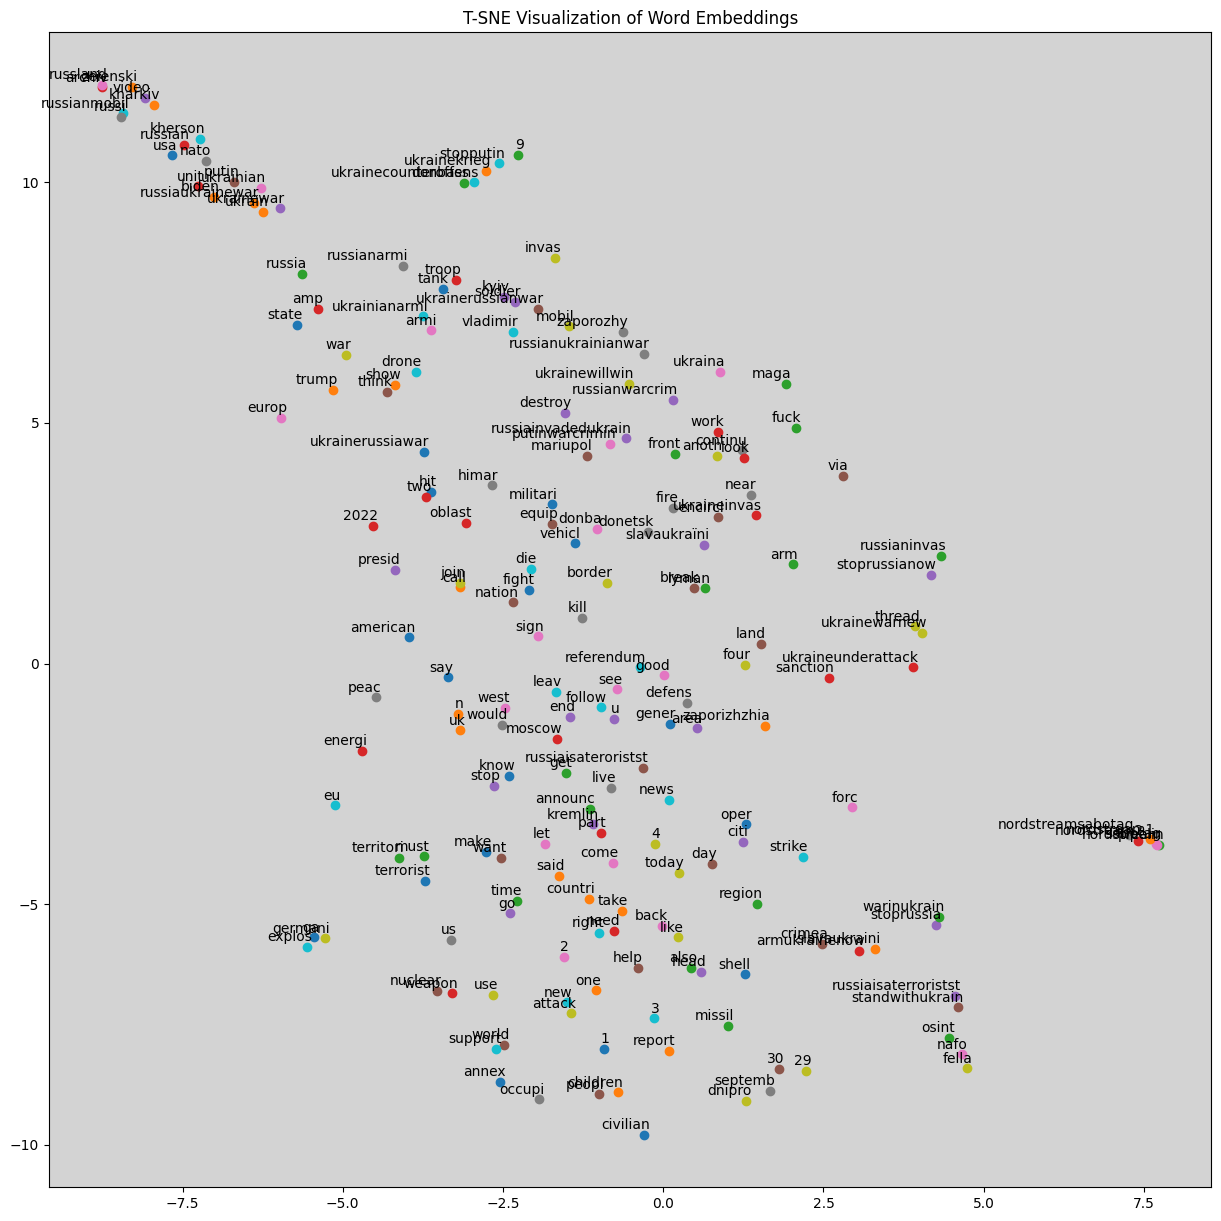

In [ ]:
#Create list where each element is a tweet text
clean_tweets = []
for tweet in merged_df['Tweet']:
  clean_tweets.append(tweet)

model = Word2Vec(clean_tweets, workers=4, min_count=50, window=10, sample=1e-3)
tsne_plot(model)